그래도 처음하는거는 클론 코딩으로 진행해야 한다고 시작함

# 정규성 검정

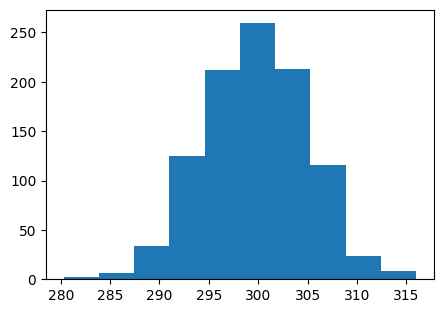

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,3.5)
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [2]:
from scipy.stats import shapiro
print(shapiro(df))

# 샤피로 검정시 p-value가 0.34이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없다

ShapiroResult(statistic=0.9981433805517037, pvalue=0.3479659233067207)


- 귀무가설: 데이터는 정규성을 가진다
- 대립가설: 데이터는 정규성을 가지지 않는다
- p-value: 데이터가 귀무가설과 얼마나 일치하는지(높을수록 가설을 따름)  
- 여기서 p-value는 유의 확률(significance probability)를 의미한다. 이 값은 가정(귀무가설을 따름)을 따른다고 가정할때 결과의 극단적일 확률을 보여준다. 이 값이 작을수록 데이터와 가설이 다를 가능성이 높다고 본다.


여기서는 p-value가 0.05보다 높으므로 정규성을 띤다

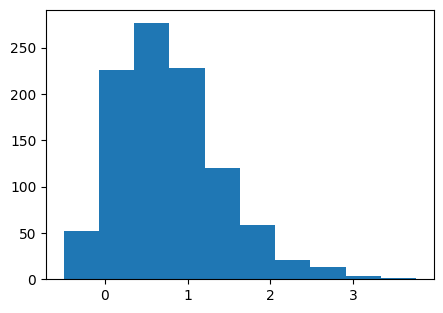

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [4]:
from scipy.stats import shapiro
print(shapiro(df))

# 샤피로 검정시 p-value가 2.3e-16 이므로 유의수준 5%에서 귀무가설인 "데이터는 정규성을 가진다"를 기각하고 대립가설을 채택한다
# 데이터는 정규성을 가지지 않는다

ShapiroResult(statistic=0.9578887230674165, pvalue=2.309852860177995e-16)


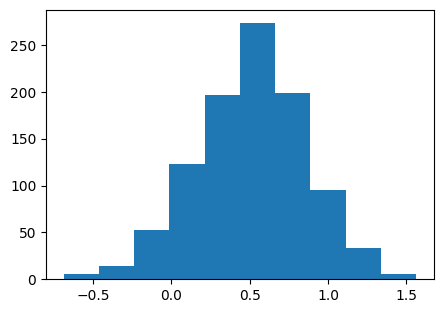

In [5]:
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)

plt.hist(log_y_data)
plt.show()


In [6]:
from scipy.stats import shapiro
print(shapiro(log_y_data))

# 샤피로 검정시 p-value가 0.17이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없다

ShapiroResult(statistic=0.9976879570377132, pvalue=0.17513126966862336)


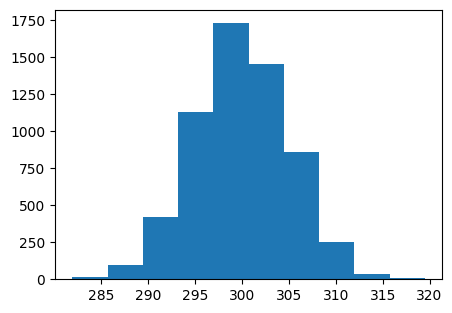

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [8]:
from scipy.stats import shapiro
print(shapiro(df))
# 샤피로 검정시 p-value가 0.15 이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없다.
# 하지만 경고 메세지에서도 보이듯이 5000개 초과의 샘플에 대해서는 샤피로 검정은 정확하지 않을 수 있다.


from scipy.stats import anderson
# anderson 검정을 실시한다
print(anderson(df['data'].values))


# anderson 검정 결과의 의미는 아래 링크에서 확인 가능
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html 
# significance_level는 유의 확률값을 나타내며 critical_values는 각 유의 확률값의 기준점이 된다.
# 5%유의 수준에서 검정을 진행하려면 statistic값인 0.82이 significance_level 이 5.에 위치한 인덱스를 
# critical_values값에서 비교하면 된다. 그 값은 0.786이므로 이보다 큰 0.82을 가지므로 
# 귀무가설을 기각하고 대립가설을 채택한다 -> 데이터는 정규성을 가지지 않는다고 판단한다. (p-value와 기각기준 부등호 개념이 반대)

ShapiroResult(statistic=0.9995353804150279, pvalue=0.15046155392344363)
AndersonResult(statistic=0.8266993530405671, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.031806887885131)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


/home/yhkim/env/BBG/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


위에 설명한 대로 샤피로 검정은 대규모 데이터(5000개 이상)에서 부정확할 가능성이 있다.

이럴때 앤더슨 검정을 사용하는데 사용법이나 출력값이 샤피로 검정이랑 조금 다른걸 chk하자  
또 앤더슨 검정은 샤피로랑 다르게 critical_value를 통해 귀무가설과 비교하는것 같다. 이때 p-value와 대소관계가 반대(크면 귀무가설 기각)이므로 chk 범위(5%)는 동일하다

# 단일 표본 T검정

```{admonition} Question 
**100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.        
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.**
```

(array([ 6.,  7., 11., 15., 16., 12., 18.,  8.,  6.,  1.]),
 array([150.44114707, 154.07327979, 157.70541251, 161.33754524,
        164.96967796, 168.60181068, 172.23394341, 175.86607613,
        179.49820885, 183.13034158, 186.7624743 ]),
 <BarContainer object of 10 artists>)

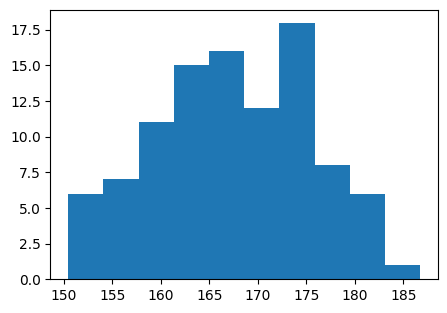

In [9]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
plt.hist(df)

In [10]:
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

# 정규성 검정 샤피로
static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value : ',pvalue,'이므로')

if pvalue < 0.05:
    print('귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.\n')
    print('윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
    
    #윌콕슨 부호순위 검정
    static, pvalue = wilcoxon(df['height']-165) # or static, pvalue = wilcoxon(df['height'], np.ones(len(df)) *165)
    
    
    
    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')
    
    
else:
    print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.\n')
    print('단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
    
    #단일 표본 t 검정
    static, pvalue = ttest_1samp(df['height'],165) 
    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')  

샤피로 정규성 검정 p-value :  0.45583339816328994 이므로
귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.

단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다
검정 결과 pvalue는 0.0018367171548080209로 결과는 귀무가설을 기각하고 대립가설을 채택한다.


정규성을 만족하는 때에 단일 표본 t검정이 가능함  
- 단일표본 t검정: 데이터의 평균이 특정 값(165)와 유사한지 확인  
  
얘도 p-value를 반환하는데 동일하게 5%이하일때만 귀무가설 기각 

In [11]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

In [12]:
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

# 정규성 검정 샤피로
static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value : ',pvalue,'이므로')

if pvalue < 0.05:
    print('귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.\n')
    print('윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
    
    #윌콕슨 부호순위 검정
    static, pvalue = wilcoxon(df['height']-165) # or static, pvalue = wilcoxon(df['height'], np.ones(len(df)) *165)
    
    
    
    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')
    
    
else:
    print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.\n')
    print('단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
    
    #단일 표본 t 검정
    static, pvalue = ttest_1samp(df['height'],165) 
    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')  

샤피로 정규성 검정 p-value :  0.013552123212013873 이므로
귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.

윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다
검정 결과 pvalue는 0.04880534424649582로 결과는 귀무가설을 기각하고 대립가설을 채택한다.


코드 자체는 위와 하나도 변하지 않았다.  
정규성을 만족하지 않으면 비모수 검정(여기서는 윌콕슨 검정)을 진행함  

***얘는 이전의 검정과 다르게 df[i]-예측 평균값을 넣어줘야함*** 결과값에 대한 해석은 p-value와 동일

# 등분산 검정

```{admonition} Question 
**두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라**
```

In [13]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [14]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

a = df[df['class'] =='A'].score
b = df[df['class'] =='B'].score

print(bartlett(a,b))

print(fligner(a,b,center='median')) #default
print(fligner(a,b,center='mean')) 

print(levene(a,b, center='median')) #default
print(levene(a,b,center='mean'))


# 등분산검정의 방법은 3가지가 있다. pvalue값은 5% 유의수준이라면 0.05보다 작은 경우 "각 그룹은 등분산이다"라는 귀무가설을 기각한다

# 아래의 결과를 보면 모두 0.05보다 크므로 귀무가설을 기각할수 없음을 알 수 있다.

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


- 등분산성: 두 그룹 이상의 데이터의 분산이 통계적으로 동일한지 확인  
- 귀무가설: 모든 그룹의 데이터의 분산이 동일하다
- 대립가설: 한 그룹이라도 분산이 다른 데이터가 존재함  

바틀릿?은 정규성 가정한 검정이고 아래 두개는 비모수적

In [15]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [16]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene


print(bartlett(df.A,df.B))
print(fligner(df.A,df.B))
print(levene(df.A,df.B))

# BartlettResult -> 등분산이다  // FlignerResult , LeveneResult -> 등분산이 아니다

BartlettResult(statistic=2.3832178811043527, pvalue=0.12264468401745829)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)
LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)


In [17]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [18]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene


print(bartlett(df.A,df.B))
print(bartlett(df.A,df.B.dropna()))
print()

print(fligner(df.A,df.B))
print(fligner(df.A,df.B.dropna()))
print()

print(levene(df.A,df.B))
print(levene(df.A,df.B.dropna()))

# bartlett ,fligner 두 검정은 nan값을 지우고 사용해야한다. LeveneResult의 경우 nan값이 포함된다면 연산이 제대로 안된다

BartlettResult(statistic=nan, pvalue=nan)
BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748438)

FlignerResult(statistic=nan, pvalue=nan)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793619)

LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)


등분산검정 할때는 nan 빼자

# 독립표본 검정

독립 표본 t검정의 경우 집단의 정규성에 따라 접근방식이 다르다    
정규성 검정은 shapiro , anderson(샘플 5000개 이상) 을 통해 확인

**데이터가 정규성을 가지는 경우(모수적 검정)**    
두 집단의 등분산 검정을 한 후      
from scipy.stats import ttest_ind     
`등분산일 경우 `     
$
\begin{align}
t = \dfrac{\bar{x}_1 - \bar{x}_2}{s \cdot \sqrt{\dfrac{1}{N_1}+\dfrac{1}{N_2}}}
\tag{equalvar=True}
\end{align}
$
             
   
`등분산이 아닐 경우`    
$
\begin{align}
t = \dfrac{\bar{x}_1 - \bar{x}_2}{\sqrt{\dfrac{s_1^2}{N_1} + \dfrac{s_2^2}{N_2}}}
\tag{equalvar=False , welch t-test}
\end{align}
$


**데이터가 정규성을 가지지 않는 경우(비모수적 검정)**

```{admonition} Question 
**두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라**
```

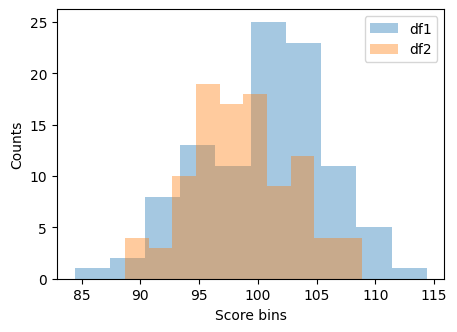

In [19]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [20]:
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))

# 두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각 하지 못한다. 두 그룹은 정규성을 가진다.

from scipy.stats import levene
print()
print(levene(df1['data'],df2['data']))
# 두그룹은 levene 검정을 확인해 본결과 pvalue 는 0.11로 귀무가실을 기각히지 못한다. 그러므로 등분산은 가진다

from scipy.stats import ttest_ind
print()
print(ttest_ind(df1,df2,equal_var=True))

# 등분산이기 때문에 equal_var=True 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
# pvalue는 0.006이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다

ShapiroResult(statistic=0.9860948333328381, pvalue=0.3796835726350978)
ShapiroResult(statistic=0.9901827646291556, pvalue=0.6793743269084671)

LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)

TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))


여기서 levene를 사용했는데 얘는 비모수적이라고하니 시험에서는 Bartlett쓰는게 좋을듯하다  
ttest_ind로 두 데이터의 평균이 통계적으로 동일한지 알 수 있다  
여기서는 p-value가 0.05이하이므로 귀무가설 기각

```{admonition} Question 
**두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라**
```

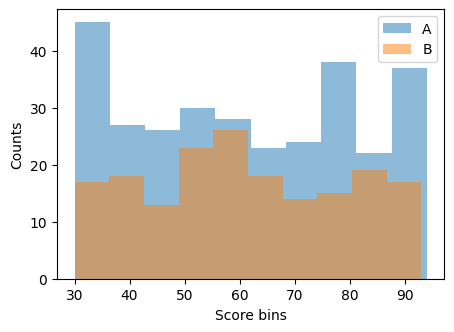

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [22]:
# 데이터 분포를 확인해보니 정규성을 위해하는 것 처럼 보인다.
# 두그룹중 한 그룹만 정규성을 위배해도 독립표본 t-검정을 할 수 없다

print(shapiro(df['B'].dropna()))
print(shapiro(df['A']))

# 두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각한다. 정규성을 위배한다. 그러므로 비모수 검정을 실시해야한다.

from scipy.stats import mannwhitneyu , ranksums
print()
print(mannwhitneyu(df['A'],df['B'].dropna()))
print(ranksums(df['A'],df['B'].dropna()))

# Mann-Whitney U Test 검정 결과 pvalue는 0.49값으로 귀무가설(평균은같다)를 기각 할 수 없다. 두그룹의 평균은 동일하다 말할 수 있다. 
# 윌콕슨 순위합 검정(ranksums)으로 확인 해봐도 같은 결과가 나온다.

ShapiroResult(statistic=0.9639432320175103, pvalue=0.0001356810116492406)
ShapiroResult(statistic=0.9375393672524898, pvalue=6.175255664337991e-10)

MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


독립표본 t-검정은 두 데이터 모두 정규성을 가져야함  
정규성을 만족하지 않으면 whitney 혹은 wilcoxon을 써서 검증하는데  
둘다 귀무가설: 두 데이터의 분포가 동일하다임

또한 이 두 검증도 nan값에 대응하지 못한다. 시험에서는 그냥 모르겠으면 전부 dropna 사용하는게 좋을듯

```{admonition} Question 
**두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라**
```

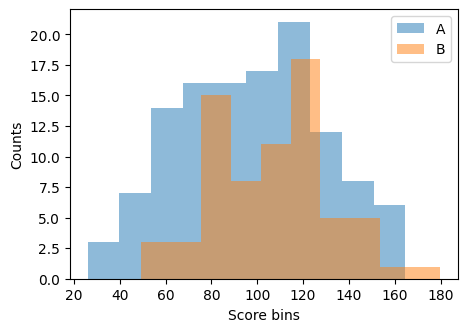

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

plt.hist(df[df['group'] =='a'].data,label='A',alpha=0.5)
plt.hist(df[df['group'] =='b'].data,label="B",alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [24]:
a = df[df['group'] =='a'].data
b = df[df['group'] =='b'].data


from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

print("두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각 하지 못한다. 두 그룹은 정규성을 가진다.")

from scipy.stats import levene
print()
print(levene(a,b))
print("두그룹은 levene 검정을 확인해 본결과 pvalue 는 0.013로 귀무가실을 기각하고 대립가설을 채택한다. 두 그룹은 등분산이 아니다")

from scipy.stats import ttest_ind
print()
print(ttest_ind(a,b,equal_var=False))

print('''등분산이 아니기 때문에 equal_var=False 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
pvalue는 0.02이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다
결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며 평균은 동일하다고 보기 어렵다
''')

ShapiroResult(statistic=0.9834129647404514, pvalue=0.14741800674950262)
ShapiroResult(statistic=0.9831848013864214, pvalue=0.47017519736901897)
두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각 하지 못한다. 두 그룹은 정규성을 가진다.

LeveneResult(statistic=6.185601018015722, pvalue=0.013750484571911342)
두그룹은 levene 검정을 확인해 본결과 pvalue 는 0.013로 귀무가실을 기각하고 대립가설을 채택한다. 두 그룹은 등분산이 아니다

TtestResult(statistic=-2.1949470315829265, pvalue=0.029512802991767898, df=171.25282465005142)
등분산이 아니기 때문에 equal_var=False 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
pvalue는 0.02이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다
결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며 평균은 동일하다고 보기 어렵다



등분산 아닐떄 equal_var=False로 하는 검증은 Welch's검증이라함

```{admonition} Question 
**두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라**
```

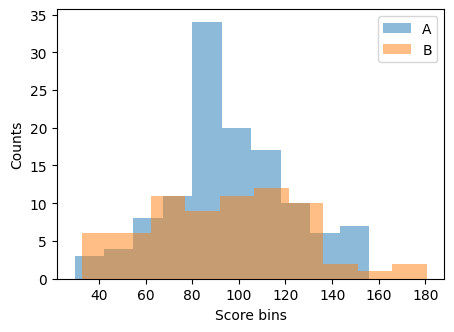

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')

plt.hist(df['a'],alpha=0.5,label='A')
plt.hist(df['b'],alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [26]:
a = df['a'].dropna()
b = df['b'].dropna()


from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

print("두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각 하지 못한다. 두 그룹은 정규성을 가진다.")

from scipy.stats import levene
print()
print(levene(a,b))
print("두그룹은 levene 검정을 확인해 본결과 pvalue 는 0.047로 귀무가실을 기각하고 대립가설을 채택한다. 두 그룹은 등분산이 아니다")

from scipy.stats import ttest_ind
print()
print(ttest_ind(a,b,equal_var=False))

print('''등분산이 아니기 때문에 equal_var=False 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
pvalue는 0.99이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하기 어렵다
결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며 평균은 동일하다고 볼 수 있다
''')

ShapiroResult(statistic=0.9865897179339467, pvalue=0.2839111805144998)
ShapiroResult(statistic=0.985432512495046, pvalue=0.5937526914945275)
두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각 하지 못한다. 두 그룹은 정규성을 가진다.

LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)
두그룹은 levene 검정을 확인해 본결과 pvalue 는 0.047로 귀무가실을 기각하고 대립가설을 채택한다. 두 그룹은 등분산이 아니다

TtestResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704, df=122.72255248639058)
등분산이 아니기 때문에 equal_var=False 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
pvalue는 0.99이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하기 어렵다
결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며 평균은 동일하다고 볼 수 있다



## 대응표본 t 검정 (paired)

```{admonition} Question 
**특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라**
```

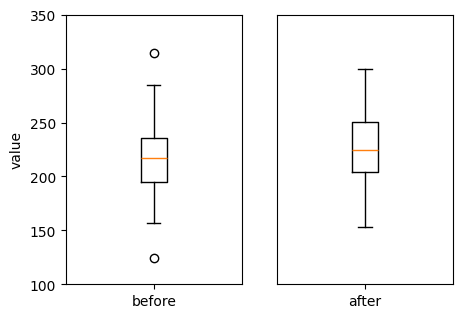

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [28]:
from scipy.stats import shapiro

before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))

from scipy.stats import levene
print()
print(levene(before,after))


from scipy.stats import ttest_rel
print(ttest_rel(before,after))


# 정규성 가짐 , 등분산성 가짐 -> 대응표본의 경우 등분산성이 파라미터에 영향을 주지않음, 
# 대응표본 t 검정 결과 pvalue는 0.01로 유의수준 5%내에서 귀무가설을 기각한다 (전 후 평균은 같지 않다)

ShapiroResult(statistic=0.9907895174016046, pvalue=0.6065791087935604)
ShapiroResult(statistic=0.9916963493176595, pvalue=0.692386232128563)

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)
TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)


- 대응표본: 같은 실험에 대해 두 조건(ex.전vs후)를 비교함
- 독립표본: 두개의 독립 데이터간의 차이를 비교함  
이전까지 했던 ttest_ind를 사용하지 않는건 그런 이유 그래도 해석 자체는 위와 동일해서 메소드 명만 잘 기억해두자

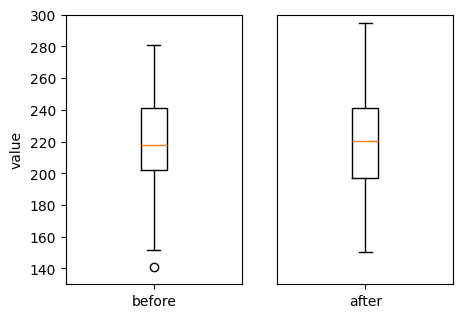

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130,300)
ax[1].set_ylim(130,300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [30]:
from scipy.stats import shapiro

before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))

from scipy.stats import levene
print()
print(levene(before,after))


from scipy.stats import ttest_rel
print(ttest_rel(before,after))
print()



# 정규성 가짐 , 등분산성 가짐 -> 대응표본의 경우 등분산성이 파라미터에 영향을 주지않음, 
# 대응표본 t 검정 결과 pvalue는 0.85로 유의수준 5%내에서 귀무가설을 기각할 수 없다 (전 후 평균은 같다)

ShapiroResult(statistic=0.992063560687721, pvalue=0.7270650360965547)
ShapiroResult(statistic=0.9920193208528514, pvalue=0.7229094514792909)

LeveneResult(statistic=1.3463330638203617, pvalue=0.24708279045237214)
TtestResult(statistic=0.188900575991026, pvalue=0.8504925317234707, df=119)



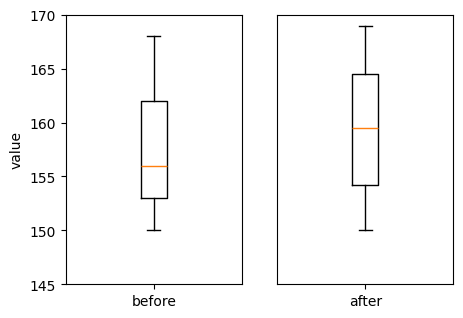

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(145,170)
ax[1].set_ylim(145,170)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [32]:
from scipy.stats import shapiro

before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))

from scipy.stats import levene
print()
print(levene(before,after))


from scipy.stats import ttest_rel
print(ttest_rel(before,after))
print()


from scipy.stats import wilcoxon
print(wilcoxon(before,after))
# 정규성을 가지지 않음 , 등분산성 가짐 -> 대응표본의 경우 등분산성이 파라미터에 영향을 주지않음, 
# 정규성을 가지지 않으므로 대응 표본 검정중 비모수 검정인 윌콕슨 부호순위 검정을 진행해야한다 (scipy.stats.wilcoxon)

# t-test의 경우 전후 변화에 대한 귀무가설을 기각되지만 윌콕슨 부호순위 검정을 통해서 확인해봤을때 귀무가설을 기각할 수 없다

ShapiroResult(statistic=0.9173727585075375, pvalue=0.0018973571840317808)
ShapiroResult(statistic=0.9448970350592873, pvalue=0.021140909861349116)

LeveneResult(statistic=0.14329522146179022, pvalue=0.7058456563194881)
TtestResult(statistic=-2.187138399865287, pvalue=0.03353471744538162, df=49)

WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)


여기서 wilcoxon 검정을 사용했는데 이건 위에서 한 데이터의 평균을 가정할때와 동일한 코드임  
즉 한 데이터에서 평균을 가정하고 그에 맞는지에도 쓰이고, 두 데이터의 평균이 동일한지에도 쓰임

In [33]:
print(wilcoxon(before-after))
#정확히는 이런 감성으로 사용할 수 있다는 뜻

WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)


```{admonition} Question 
**한 기계 부품의 rpm 수치를 두가지 다른 상황에서 측정했다.(총 70세트) b 상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라**
```

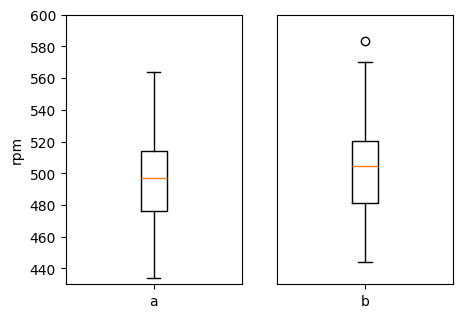

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df[df['group']=='a'].rpm)
ax[1].boxplot(df[df['group']=='b'].rpm)
ax[0].set_xticklabels(['a'])
ax[1].set_xticklabels(['b'])
ax[0].set_ylim(430,600)
ax[1].set_ylim(430,600)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('rpm')
plt.show()

In [35]:
from scipy.stats import shapiro

a = df[df['group']=='a'].rpm
b =  df[df['group']=='b'].rpm
print(shapiro(a))
print(shapiro(b))

from scipy.stats import levene
print()
print(levene(a,b))


from scipy.stats import ttest_rel
print(ttest_rel(a,b,alternative='greater'))
print()


# 정규성을 가짐 , 등분산성 가짐 -> 대응표본의 경우 등분산성이 파라미터에 영향을 주지않음, 
# a,b,alternative='greater' 의 의미는 a >b가 대립가설이 된다는 것이다. p-value는 0.96으로
# 귀무가설인 a<=b를 기각하지 못한다. 그러므로 b상황이 a 상황보다 rpm 값이 크다고 이야기 할수 있다.

ShapiroResult(statistic=0.9907215247460179, pvalue=0.888420220853863)
ShapiroResult(statistic=0.9846746597671578, pvalue=0.5504989397841747)

LeveneResult(statistic=0.06716114122680159, pvalue=0.7959020864923277)
TtestResult(statistic=-1.9018108294460812, pvalue=0.9693143365355352, df=69)



greater를 주의하자! left<right를 가정하는 거임!!

In [36]:
print(wilcoxon(a,b,alternative='greater'))
#이렇게도 사용가능

WilcoxonResult(statistic=944.0, pvalue=0.9596706195980413)


## 카이제곱 검정 (교차분석) 
`일원 카이제곱검정 (chisquare , 카이제곱 적합도 검정)`       
한 개의 요인에 의해 k개의 범주를 가질때 이론적 분포를 따르는지 검정    
`이원 카이제곱검정 (chi2_contingency ,fisher_exact(빈도수 5개 이하 셀이 20% 이상일때) , 카이제곱독립검정)`     
모집단이 두개의 변수에 의해 범주화 되었을 때, 두 변수들 사이의 관계가 독립인지 아닌지 검정 

```{admonition} Question 
**144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라**
```

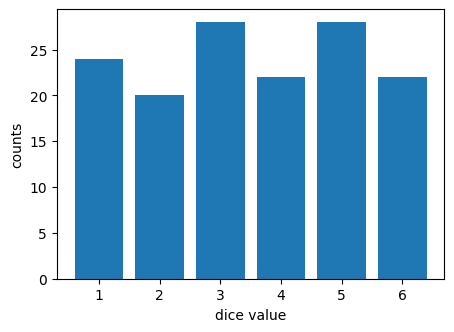

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

In [38]:
# 주사위 눈금의 발생확률은 1/6으로 모두 동일하다. 그러므로 각 눈금의 기댓값은 실제 발생한 모든값을 6으로 나눈 값이다.
# 그러니깐 144에서 6으로 나눈 값인 24가 기댓값이 된다

from scipy.stats import chisquare
df['expected'] = (df['counts'].sum()/6).astype('int')
print(chisquare(df.counts,df.expected)) 

# p-value는 0.8로 귀무가설인 "각 주사위 눈금 발생비율은 동일함"을 기각 할 수 없다 

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


- 카이제곱검정: 데이터가 예상 분포와 일치하는지 확인
- 귀무가설: 데이터와 기대값이 동일
- 대립가설: 데이터와 기대값이 다름

```{admonition} Question 
**다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다. 인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다.     
이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라**
```

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [40]:
target

NameError: name 'target' is not defined

In [ ]:
target["count"]

hands
right    420
left      80
Name: count, dtype: int64

In [ ]:
target = df.hands.value_counts().to_frame()
target['expected'] = [int(target["count"].sum()*0.8),int(target["count"].sum()*0.2)]
display(target)

from scipy.stats import chisquare
print(chisquare(target["count"],target.expected))

# 알려진 비율로 계산된 기댓값을 구하여 카이제곱검정을 시행한다.
# p-value는 0.02로 유의수준 5%이내에서 귀무가설을 기각하고 대립가설을 채택한다
# 즉 주어진 집단의 왼손, 오른손 비율은 0.2, 0.8으로 볼 수 없다

,count,expected
hands,,
right,420,400
left,80,100


Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)


In [ ]:
print(target["count"])
print(target.expected)


hands
right    420
left      80
Name: count, dtype: int64
hands
right    400
left     100
Name: expected, dtype: int64


전반적으로 각 클래스당 기댓값을 설정하고 분포의 동일성을 확인하는듯

```{admonition} Question 
**다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라**
```

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [ ]:
cdf = pd.crosstab(df['측정회원성별'],df['등급'])
display(cdf)

from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))
chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)

# p-value는 0에 근접하므로 측정회원성별 - 등급은 연관이 없다는 귀무가설을 기각하고, 성별관 체력 등급간에는 관련이 있다고 볼 수 있다.

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401677e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))
7.481892813401677e-26


- 카이제곱 독립성 검정: 두 범주형 데이터간에 통계적 연관성 확인
- 귀무가설: 두 데이터는 서로 독립이다
- 대립가설: 두 데이터는 서로 독립이 아니다(연관이 있다)

In [ ]:
for x in [chi2 , p ,dof, expected]:
    print(x)

120.06233631119409
7.481892813401677e-26
3
[[1220.25 1220.25 1220.25 1220.25]
 [2128.75 2128.75 2128.75 2128.75]]


뭐 생각할게 있나? 내가 보기엔 3단원에서 p-value는 신이야

In [ ]:
df["측정회원성별"]

0        M
1        F
2        M
3        M
4        M
        ..
13391    M
13392    M
13393    M
13394    M
13395    M
Name: 측정회원성별, Length: 13396, dtype: object

In [ ]:
df["등급"]

0        C
1        B
2        B
3        A
4        C
        ..
13391    C
13392    C
13393    B
13394    B
13395    A
Name: 등급, Length: 13396, dtype: object

In [ ]:
cdf

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


notation이 햇갈리긴 하는데 cdf는(Class per Class distribution)을 의미함  
**cdf = pd.crosstab(df['측정회원성별'],df['등급'])**  이런 느낌으로 CDF 만드는거나 외워두자

A, B, C 그룹이 나눠져 있음
- 귀무가설 : A, B, C 그룹 간의 평균 차이가 없다.
- 대립가설 : A, B, C 그룹 간의 평균 차이가 있다.

검정통계량, p-value = stats.f_oneway(A그룹, B그룹, C그룹)